<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

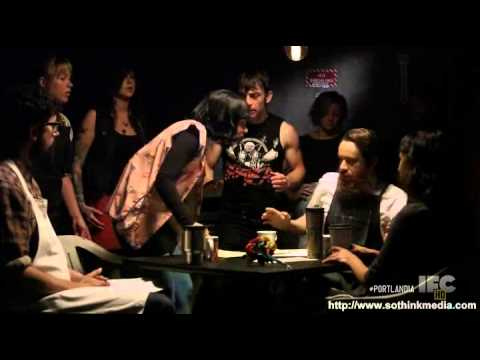

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\alfar\\Documents\\Repos\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [94]:
import pandas as pd

url = r"C:\Users\alfar\Documents\Repos\DS-Unit-4-Sprint-1-NLP\module1-text-data\data\yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [97]:
temp = shops
temp = temp.sort_values(by='star_rating')
temp

,coffee_shop_name,full_review_text,star_rating
3807,Cream Whiskers,9/14/2016 Did you know that humans are very p...,1.0 star rating
4856,The Buzz Mill,7/27/2016 I have no idea what their drinks ar...,1.0 star rating
1861,Epoch Coffee,2/13/2016 I lived within walking distance to ...,1.0 star rating
2328,Mary’s Cafe,"10/15/2015 The hours are wrong, the site says...",1.0 star rating
6459,"Strange Brew, Austin Coffee",9/30/2015 I want love this place even though ...,1.0 star rating
...,...,...,...
4701,Cafe Ruckus,4/19/2014 1 check-in Listed in The Yelp 100 C...,5.0 star rating
1905,Apanas Coffee & Beer,10/19/2016 The staff was extremely friendly a...,5.0 star rating
1904,Apanas Coffee & Beer,9/10/2016 Good selection of local Austin area...,5.0 star rating
4671,Elixer Coffee,7/21/2011 Cheerful and attentive staff. Delic...,5.0 star rating


In [28]:
print(shops['star_rating'].iloc[0])

 5.0 star rating 


In [4]:
print(len(shops))

7616


In [6]:
# Start here 
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: x.lower())
shops['full_review_text'].value_counts()

 11/9/2016 really cute and heavily hipster atmosphere. we tried this place late night on saturday and enjoyed the first visit. you will want to try their swing for sure. seating space is somewhat limited and no wifi is available, so be aware. this is more like a place for you to enjoy its atmosphere. drinks were good, though make sure you have enough in your bank account because their drinks are probably not for broke college students. that swing!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [7]:
# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [8]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [19]:
shops['tokens'] = shops['full_review_text'].apply(tokenize)

In [14]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [21]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
shops['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('the', 34809),
 ('and', 26650),
 ('a', 22755),
 ('i', 20237),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10353),
 ('was', 9707),
 ('in', 9546)]

In [22]:
wc = count(shops['tokens'])

In [51]:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [38]:
STOP_WORDS = nlp.Defaults.stop_words.union(['coffee','I', ' ', 'i', 'it', "it's", 'it.', 'the', 'this',])

In [98]:
x1 = shops[shops['star_rating'] == shops['star_rating'].iloc[0]]
x2 = shops[shops['star_rating'] == shops['star_rating'].iloc[3807]]

In [99]:
x1.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
7,The Factory - Cafe With a Soul,11/2/2016 2 check-ins Love this place! 5 sta...,5.0 star rating
9,The Factory - Cafe With a Soul,11/10/2016 3 check-ins This place has been sh...,5.0 star rating
13,The Factory - Cafe With a Soul,12/5/2016 This is such a cute little cafe! I'...,5.0 star rating
14,The Factory - Cafe With a Soul,11/13/2016 Beautiful eccentric coffee shop wi...,5.0 star rating


In [100]:
x2.head()

,coffee_shop_name,full_review_text,star_rating
25,The Factory - Cafe With a Soul,"12/2/2016 Okay, so after visiting my friends ...",1.0 star rating
39,The Factory - Cafe With a Soul,12/2/2016 A cafe that doesn't have Wifi but m...,1.0 star rating
94,Vintage Heart Coffee,"9/18/2016 I was not impressed. First of all, ...",1.0 star rating
99,Vintage Heart Coffee,9/4/2016 2 check-ins Second attempt at the pl...,1.0 star rating
322,Mozart’s Coffee Roasters,"11/29/2015 When I lived in Austin, Mozarts wa...",1.0 star rating


In [92]:
def lts(df):
    for i in range(len(df)):
        df['tokens'].iloc[i] = '-'.join(df['tokens'].iloc[i])
        df['tokens'].iloc[i] = df['tokens'].iloc[i].replace('-', ' ')
    return df['tokens']

In [42]:
from spacy.tokenizer import Tokenizer

tokenizer = Tokenizer(nlp.vocab)

In [101]:
tokens = []

for doc in tokenizer.pipe(x1['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
x1['tokens'] = tokens

C:\Users\alfar\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [102]:
tokens1 = []

for doc1 in tokenizer.pipe(x2['full_review_text'], batch_size=500):
    
    doc_tokens1 = []
    
    for token1 in doc1: 
        if token1.text.lower() not in STOP_WORDS:
            doc_tokens1.append(token1.text.lower())
   
    tokens1.append(doc_tokens1)
    
x2['tokens'] = tokens1

C:\Users\alfar\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [103]:
x1.head()

,coffee_shop_name,full_review_text,star_rating,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[11/25/2016, 1, check-in, love, love, loved, a..."
7,The Factory - Cafe With a Soul,11/2/2016 2 check-ins Love this place! 5 sta...,5.0 star rating,"[11/2/2016, 2, check-ins, love, place!, 5, sta..."
9,The Factory - Cafe With a Soul,11/10/2016 3 check-ins This place has been sh...,5.0 star rating,"[11/10/2016, 3, check-ins, place, shown, socia..."
13,The Factory - Cafe With a Soul,12/5/2016 This is such a cute little cafe! I'...,5.0 star rating,"[12/5/2016, cute, little, cafe!, i've, driven,..."
14,The Factory - Cafe With a Soul,11/13/2016 Beautiful eccentric coffee shop wi...,5.0 star rating,"[11/13/2016, beautiful, eccentric, shop, libra..."


In [104]:
x2.head()

,coffee_shop_name,full_review_text,star_rating,tokens
25,The Factory - Cafe With a Soul,"12/2/2016 Okay, so after visiting my friends ...",1.0 star rating,"[12/2/2016, okay,, visiting, friends, la, tryi..."
39,The Factory - Cafe With a Soul,12/2/2016 A cafe that doesn't have Wifi but m...,1.0 star rating,"[12/2/2016, cafe, doesn't, wifi, makes, order,..."
94,Vintage Heart Coffee,"9/18/2016 I was not impressed. First of all, ...",1.0 star rating,"[9/18/2016, impressed., all,, parking, huge, h..."
99,Vintage Heart Coffee,9/4/2016 2 check-ins Second attempt at the pl...,1.0 star rating,"[9/4/2016, 2, check-ins, second, attempt, plac..."
322,Mozart’s Coffee Roasters,"11/29/2015 When I lived in Austin, Mozarts wa...",1.0 star rating,"[11/29/2015, lived, austin,, mozarts, spot, me..."


In [105]:
x1['tokens'] = lts(x1)
x2['tokens'] = lts(x2)

C:\Users\alfar\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\alfar\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\alfar\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [106]:
x1.head()

,coffee_shop_name,full_review_text,star_rating,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,11/25/2016 1 check in love love loved atmosphe...
7,The Factory - Cafe With a Soul,11/2/2016 2 check-ins Love this place! 5 sta...,5.0 star rating,11/2/2016 2 check ins love place! 5 stars clea...
9,The Factory - Cafe With a Soul,11/10/2016 3 check-ins This place has been sh...,5.0 star rating,11/10/2016 3 check ins place shown social medi...
13,The Factory - Cafe With a Soul,12/5/2016 This is such a cute little cafe! I'...,5.0 star rating,12/5/2016 cute little cafe! i've driven place ...
14,The Factory - Cafe With a Soul,11/13/2016 Beautiful eccentric coffee shop wi...,5.0 star rating,11/13/2016 beautiful eccentric shop library pe...


In [107]:
x2.head()

,coffee_shop_name,full_review_text,star_rating,tokens
25,The Factory - Cafe With a Soul,"12/2/2016 Okay, so after visiting my friends ...",1.0 star rating,"12/2/2016 okay, visiting friends la trying min..."
39,The Factory - Cafe With a Soul,12/2/2016 A cafe that doesn't have Wifi but m...,1.0 star rating,12/2/2016 cafe doesn't wifi makes order ipad. ...
94,Vintage Heart Coffee,"9/18/2016 I was not impressed. First of all, ...",1.0 star rating,"9/18/2016 impressed. all, parking huge hassle ..."
99,Vintage Heart Coffee,9/4/2016 2 check-ins Second attempt at the pl...,1.0 star rating,9/4/2016 2 check ins second attempt place exce...
322,Mozart’s Coffee Roasters,"11/29/2015 When I lived in Austin, Mozarts wa...",1.0 star rating,"11/29/2015 lived austin, mozarts spot me. coun..."


In [108]:
x1['lemmas'] = x1['tokens'].apply(get_lemmas)
x2['lemmas'] = x2['tokens'].apply(get_lemmas)

C:\Users\alfar\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\alfar\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


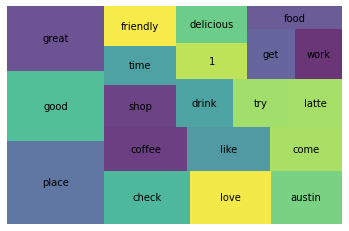

In [109]:
wc = count(x1['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [110]:
wc_top20.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
66,place,1863,2813,1.0,0.017317,0.017317,0.492857
79,good,1667,2406,2.0,0.014811,0.032128,0.441005
304,great,1567,2196,3.0,0.013518,0.045646,0.414550
35,check,1465,1586,4.0,0.009763,0.055410,0.387566
2,love,1111,1503,5.0,0.009252,0.064662,0.293915


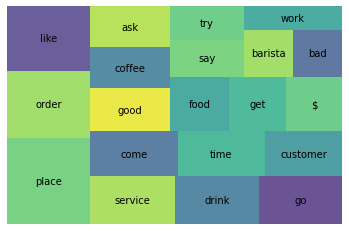

In [111]:

twc = count(x2['lemmas'])
twc_top20 = twc[twc['rank'] <= 20]

squarify.plot(sizes=twc_top20['pct_total'], label=twc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [113]:
twc_top20.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
46,place,140,232,1.0,0.015453,0.015453,0.503597
26,order,95,181,2.0,0.012056,0.027509,0.341727
109,like,104,173,3.0,0.011523,0.039033,0.374101
31,service,94,130,4.0,0.008659,0.047692,0.338129
6,drink,60,129,5.0,0.008593,0.056285,0.215827


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

